# 06과 단변량분석 추가확인사항

## 1.라이브러리 불러오기

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


## 2.이상치 식별

**이상치(Outlier)**  

* 대부분의 데이터에서 많이(?) 벗어난 값을 이상치라고 부릅니다.
* 대부분의 데이터가 가지고 있는 범위, 패턴에서 벗어난 값으로, 대부분의 데이터와는 다른 메커니즘으로 발생된 데이터 입니다.

* 얼마나 벗어나면 이상치일까요?
    * 여기에 정답은 없습니다만, 일반적인 기준은 다음과 같습니다.
    * 데이터의 분포가 정규분포에 가깝다면, 3 * 표준편차 바깥을 이상치로 보자.
    * 박스플롯의 수염 끝 fence 밖의 값들을 이상치로 보자.(정규분포라면 수염의 끝은 대략 3*표준편차와 비슷해 짐)

* 모델링에서 이상치를 조치해야 하는 알고리즘과 이상치에 영향을 받지 않는 알고리즘이 있습니다.
* 모델링에서 이상치 조치는 필수가 아닙니다.(필요에 따라서…)


1) 이상치 식별 : boxplot 으로부터

[21.77  0.67]
[35.9 57. ]


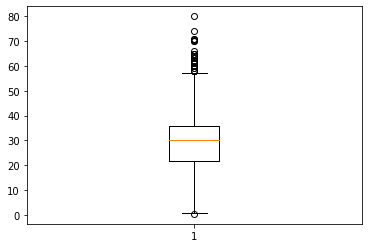

In [2]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv')
box1 = plt.boxplot(titanic['Age'])

print(box1['whiskers'][0].get_ydata()) # 아래쪽 수염의 max, min
print(box1['whiskers'][1].get_ydata()) # 위쪽 수염의 min, max

lower_fense = box1['whiskers'][0].get_ydata()[1]
upper_fense = box1['whiskers'][1].get_ydata()[1]

In [3]:
# 조회하기
# titanic.loc[(titanic['Age']< lower_fense) | (titanic['Age']> upper_fense)]
# ~(조건절) : 조건절의 반대)
titanic.loc[~(titanic['Age'].between(lower_fense, upper_fense))] 


,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family,Mother,Fare2
11,12,1,1,Miss,female,58.00,0,0,113783,26.5500,C103,S,Age_50,1,0,26.5500
33,34,0,2,Mr,male,66.00,0,0,C.A. 24579,10.5000,NaN,S,Age_60,1,0,10.5000
54,55,0,1,Mr,male,65.00,0,1,113509,61.9792,B30,C,Age_60,2,0,61.9792
94,95,0,3,Mr,male,59.00,0,0,364500,7.2500,NaN,S,Age_50,1,0,7.2500
96,97,0,1,Mr,male,71.00,0,0,PC 17754,34.6542,A5,C,Age_70,1,0,34.6542
116,117,0,3,Mr,male,70.50,0,0,370369,7.7500,NaN,Q,Age_70,1,0,7.7500
170,171,0,1,Mr,male,61.00,0,0,111240,33.5000,B19,S,Age_60,1,0,33.5000
195,196,1,1,Miss,female,58.00,0,0,PC 17569,146.5208,B80,C,Age_50,1,0,146.5208
232,233,0,2,Mr,male,59.00,0,0,237442,13.5000,NaN,S,Age_50,1,0,13.5000
252,253,0,1,Mr,male,62.00,0,0,113514,26.5500,C87,S,Age_60,1,0,26.5500


2) .describe()로 부터 직접 계산

In [ ]:
desc = titanic['Age'].describe()
print(desc)

iqr = desc[6] - desc[4]
lower_fense = desc[4] - 1.5 * iqr
upper_fense = desc[6] + 1.5 * iqr

In [ ]:
# 조회하기
titanic.loc[(titanic['Age']< lower_fense) | (titanic['Age']> upper_fense)]

In [ ]:
# *이상치 조치 
    *삭제
    *값을 보정 : 이상치 제외하고 최대,최소값으로 이상치 값을 수정한다.

## 3.결측치(NaN) 식별

* 결측치(NaN)
    * Not a Number의 약자
    * NA(Not Available) 라고도 부릅니다.
    * 결측치, 사용할 수 없는 값, 빈 값
    * 이를테면, 분석(모델링)에서 사용할 수 없는 값을 의미 합니다.
    * 모델링에서 **결측치 조치는 필수** 입니다.


In [4]:
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')

1) 결측치 식별 : 변수 별

In [5]:
print(titanic['Age'].isnull())
print('-' * 50)
print(titanic['Age'].isnull().sum())
print('-' * 50)
print(titanic['Age'].isna().sum())
print('-' * 50)
print(titanic['Age'].isna().sum() / len(titanic['Age']))

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool
--------------------------------------------------
177
--------------------------------------------------
177
--------------------------------------------------
0.19865319865319866


2) 결측치 식별 : 데이터프레임 전체

In [6]:
print(titanic.isnull())
print('-' * 50)
print(titanic.isnull().sum())
print('-' * 50)
print(titanic.isna().sum())

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

3) 결측치 시각화

* seaborn 패키지는 다음 과에서 배웁니다. 여기서는 일단 사용해 봅시다.


In [7]:
import seaborn as sns

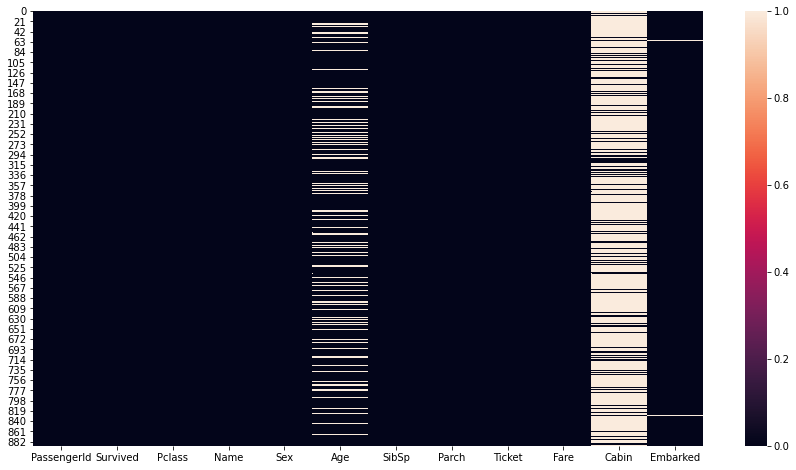

In [8]:
plt.figure(figsize = (15,8))
sns.heatmap(titanic.isnull())
plt.show()

3) 결측치로 인한 오류

* 몇몇 함수들은 결측치가 있는 데이터를 그대로 이용할 때 제대로 작동하지 않거나 오류가 발생될 수 있습니다.


① 박스플롯이 제대로 그려지지 않습니다.

In [ ]:
plt.boxplot(titanic['Age'])
plt.show()

② 계산에 오류가 발생됩니다.

사례가 뒤에서 나오므로 그때 다시 설명하겠습니다.(상관분석, 로지스틱회귀 등)

* 그래서 이럴때는 NaN을 제외하고 함수를 실행해야 합니다.
* 제외하는 방법 : .notnull()

In [ ]:
# Age에 NaN이 있는 행은 제외
titanic.loc[titanic['Age'].notnull()]

# [실습] 단변량분석 종합실습 : 직원이직 분석

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 직원들이 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 필요하다면, 검색을 통해 '직원이 회사를 떠나는 이유' 등을 찾아보는 것은 데이터 분석을 하는데 도움이 될 것입니다.
* 자, 이제 인사팀에서 제공한 데이터를 바탕으로 각각 개별 변수의 분포를 살펴보며, 비즈니스 인사이트를 최대한 도출해 봅시다.


**단변량 분석 할 때 확인해야 할 점들**

* 개별 변수의 분포로 부터…
    * 값의 범위 확인
    * 데이터가 모여 있는 구간(혹은 범주)와 희박한 구간(혹은 범주) 확인
    * 이상치 확인 및 조치 방안
    * 결측치 확인 및 조치 방안
    * 가변수화, 스케일링 대상 선별

* 비즈니스의 일반 사항과 특이사항을 도출
    * 추가 분석 대상 도출.


## 0.환경준비

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

|	구분	|	변수 명	|	내용	|	type	|	비고	|
|	----	|	----	|	----	|	----	|	----	|
|	**Target**	|	**Attrition**	|	이직여부, 	|	범주	|Yes , No		|
|	feature	|	Age	|	나이	|	숫자	|		|
|	feature	|	BusinessTravel	|	출장빈도	|	범주	|Travel_Rarely, Travel_Frequently, Non-Travel		|
|	feature	|	Department	|	부서	|	범주	|Research & Development, Sales, Human Resources	|
|	feature	|	DistanceFromHome	|	집-직장 거리	|	숫자	|	마일	|
|	feature	|	EmployeeNumber	|	사번	|	??	|		|
|	feature	|	Gender	|	성별	|	범주	| Male, Female		|
|	feature	|	JobSatisfaction	|	직무 만족도	|	범주	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	feature	|	MaritalStatus	|	결혼상태	|	범주	| Single, Married, Divorced		|
|	feature	|	MonthlyIncome	|	월급	|	숫자	| 달러	|
|	feature	|	OverTime	|	야근여부	|	범주	|	Yes, No	|
|	feature	|	PercentSalaryHike	|	전년대비 급여인상율	|	숫자	|	%	|
|	feature	|	RelationshipSatisfaction	|	관계만족도	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High|
|	feature	|	StockOptionLevel	|	스톡옵션레벨	|	범주	| 0 : 없음, 1~3 (클수록 스톡옵션을 많이 받음|
|	feature	|	TotalWorkingYears	|	총 경력 연수	|	숫자	|		|
|	feature	|	WorkLifeBalance	|	워라밸	|	범주	| 1 Low, 2 Medium, 3 High, 4 Very High

In [11]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
attrition = pd.read_csv(path)
attrition.drop(['Education','EducationField', 'EnvironmentSatisfaction', 'JobRole', 'JobInvolvement','NumCompaniesWorked','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']
               , axis = 1, inplace = True)
attrition.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,WorkLifeBalance
0,No,33,Travel_Rarely,Research & Development,7.0,817,Male,3,Married,11691,No,11,4,0,14,4
1,No,35,Travel_Frequently,Research & Development,18.0,1412,Male,4,Single,9362,No,11,3,0,10,3
2,No,42,Travel_Rarely,Research & Development,6.0,1911,Male,1,Married,13348,No,13,2,1,18,4
3,No,46,Travel_Rarely,Sales,2.0,1204,Female,1,Married,17048,No,23,1,0,28,3
4,No,39,Travel_Frequently,Sales,NaN,1812,Male,4,Divorced,4127,No,18,4,1,7,3


## 숫자형 변수 : 

### ① Age

In [12]:
var= 'Age'

1) 변수의 비즈니스 의미

> 직원 나이

2) 숫자, 범주?

> 숫자

3) NaN 존재 유무 및 조치방안

In [13]:
attrition[var].isna().sum()

0

> NaN은 존재하지 않음

4) 기초통계량(수치화)

In [14]:
attrition[var].describe()

count    1250.000000
mean       36.931200
std         9.122162
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

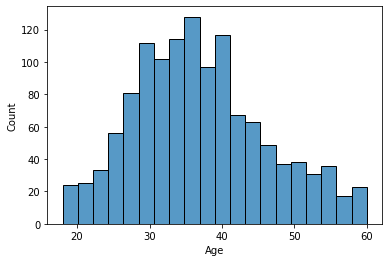

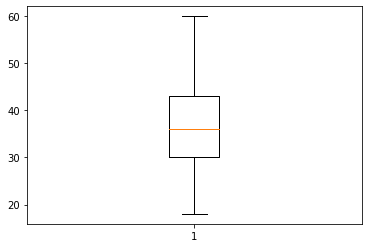

[30. 18.]
[43. 60.]


In [46]:
sns.histplot(attrition[var], bins = 20)
plt.show()

box = plt.boxplot(attrition[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

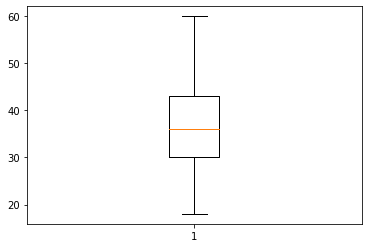

[30. 18.]
[43. 60.]


In [16]:
box = plt.boxplot(attrition[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

* 30대가 주축을 이루고 있음
* 18세 : 입사 가능 연령
* 60세 : 정년
* 40세 이후에 조금은 급격히 줄어드는 것으로 보아, 이때가 퇴사를 많이 하는 시점으로 보임. (보통 대기업에서 40대에 승진에서 누락되는 사람들, 새로운 분야로 진출하려는 사람들, 창업자들이 많아짐)

7) 추가 분석해 볼 사항이 있나요?

* 적절한(단순히 10살 단위가 아닌) 연령대로 분할하고, 연령대 별로 이직여부(이직율)을 검토해볼 필요가 있음
    * 직원들의 라이프사이클 파악 필요. 대졸, 입사 2~3년차, 5년차, 7년차 등 승진 및 이직을 고려하는 일반적인 시기 등 감안

### ② DistanceFromHome	

1) 변수의 비즈니스 의미

In [ ]:
직장으로부터의 거리

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [21]:
#존재 전값으로 대체

attrition['DistanceFromHome'].fillna(method='ffill', inplace=True)

print(attrition['DistanceFromHome'].isna().sum())

0


4) 기초통계량(수치화)

In [22]:
attrition['DistanceFromHome'].describe()

count    1250.000000
mean        9.274400
std         8.206155
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64

5) 분포 확인(시각화)

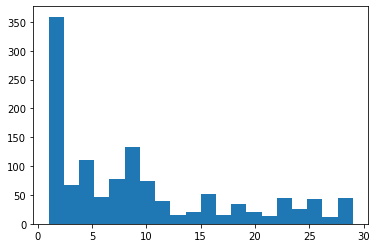

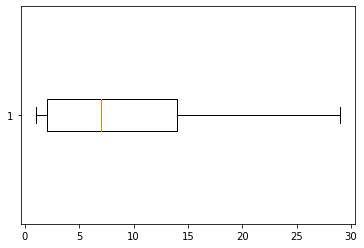

[1. 1.]
[1. 1.]


In [27]:
plt.hist(attrition['DistanceFromHome'], bins=20)
plt.show()

box = plt.boxplot(attrition['DistanceFromHome'], vert=False)
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
대부분 15 거리 안에 집이 있음, 거리가 멀수록 이직할 확률이 있기때문에 확인해봐야 함

7) 추가 분석해 볼 사항이 있나요?

In [ ]:
다른 회사의 집과 직장사이의 거리 평균을 확인하여 자사와의 평균 비교

### ③ MonthlyIncome

In [29]:
mon = attrition['MonthlyIncome']

1) 변수의 비즈니스 의미

In [ ]:
월급

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무 및 조치방안

In [35]:
mon.isna().sum()

0

4) 기초통계량(수치화)

In [31]:
mon.describe()

count     1250.000000
mean      6525.548000
std       4676.979554
min       1009.000000
25%       2932.250000
50%       4988.000000
75%       8437.500000
max      19999.000000
Name: MonthlyIncome, dtype: float64

5) 분포 확인(시각화)

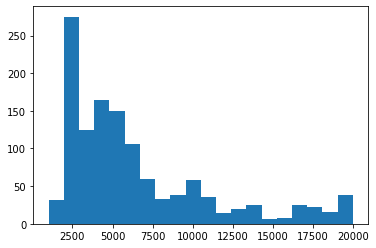

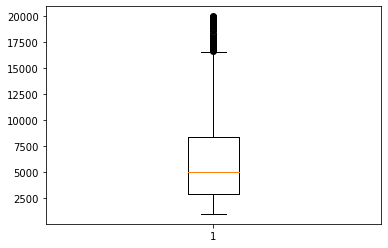

[2932.25 1009.  ]
[ 8437.5 16606. ]


In [49]:
plt.hist(mon, bins=20)
plt.show()

monbox = plt.boxplot(mon, vert=True)
plt.show()

print(monbox['whiskers'][0].get_ydata())
print(monbox['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
평균적으로 5000정도를 받으나 많은 사람이 2500정도의 평균 이하의 월급을 받고 있음
연차를 분석하여 적절한 월급인지 판단 필요

7) 추가 분석해 볼 사항이 있나요?

In [ ]:
동종업계와의 평균을 비교

### ④ PercentSalaryHike

In [37]:
persa = attrition['PercentSalaryHike']

1) 변수의 비즈니스 의미

In [ ]:
전년대비 급여 인상율

2) 숫자, 범주?

In [36]:
숫자

NameError: name '숫자' is not defined

3) NaN 존재 유무 및 조치방안

In [38]:
persa.isna().sum()

0

4) 기초통계량(수치화)

In [39]:
persa.describe()

count    1250.000000
mean       15.216000
std         3.625556
min        11.000000
25%        12.000000
50%        14.000000
75%        18.000000
max        25.000000
Name: PercentSalaryHike, dtype: float64

5) 분포 확인(시각화)

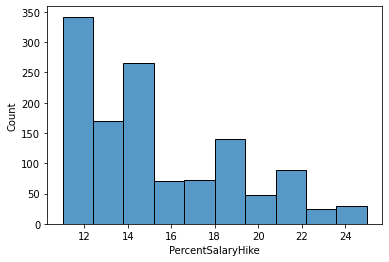

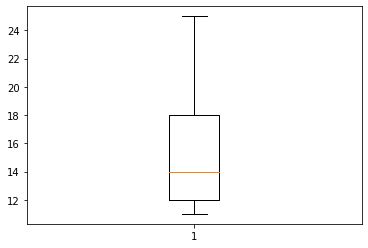

[12. 11.]
[18. 25.]


In [111]:
sns.histplot(persa, bins = 10)
plt.show()

box = plt.boxplot(persa)
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
급여 인상율은 13프로 정도의 값을 대부분 인상되고 있음


7) 추가 분석해 볼 사항이 있나요?

In [ ]:
동종업계 인상율 확인

### ⑤ TotalWorkingYears

In [43]:
tot=attrition['TotalWorkingYears']

1) 변수의 비즈니스 의미

2) 숫자, 범주?

In [52]:
tot.unique()

array([14, 10, 18, 28,  7,  4,  2,  6,  3, 16, 15, 20, 21,  8, 25, 23, 29,
        1, 34, 17, 30, 12,  5, 13, 31, 22,  9, 32, 24, 11,  0, 26, 27, 19,
       35, 37, 36, 33, 38, 40], dtype=int64)

3) NaN 존재 유무 및 조치방안

In [44]:
tot.isna().sum()

0

4) 기초통계량(수치화)

In [45]:
tot.describe()

count    1250.00000
mean       11.33920
std         7.79687
min         0.00000
25%         6.00000
50%        10.00000
75%        15.00000
max        40.00000
Name: TotalWorkingYears, dtype: float64

5) 분포 확인(시각화)

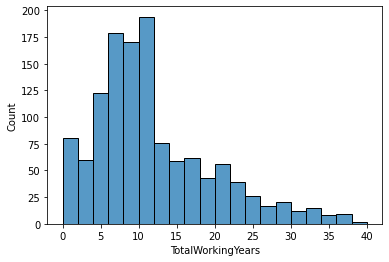

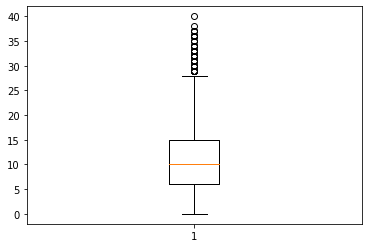

[6. 0.]
[15. 28.]


In [47]:
sns.histplot(tot, bins = 20)
plt.show()

box = plt.boxplot(tot)
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
대부분 10년 정도의 경력이고 14년정도를 기준으로 감소하는 형태
장기근속하는 직원이 적음

7) 추가 분석해 볼 사항이 있나요?

In [ ]:
동종업계의 경력 평균 및 분포 확인

## 범주형 변수

### ① Attrition

In [50]:
var = 'Attrition'

1) 변수의 비즈니스 의미

> 직원 이직여부

2) 숫자, 범주?

In [51]:
attrition[var].unique()

array(['No', 'Yes'], dtype=object)

> * 범주형 데이터
* 범주 종류 Yes , No

3) NaN 존재 유무 및 조치방안

In [53]:
attrition[var].isna().sum()

0

> * NA 없음
* 당연히 Target이기에 NA가 있으면 안됨!


4) 가변수화 필요 여부

> * Yes , No로 되어 있음. 
* 1, 0으로 변환해야 함.

In [55]:
# 변환 코드
attrition['Attrition'] = np.where(attrition['Attrition'] == 'Yes', 1, 0)

5) 기초통계량(수치화)

In [56]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

0    1050
1     200
Name: Attrition, dtype: int64
0    0.84
1    0.16
Name: Attrition, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


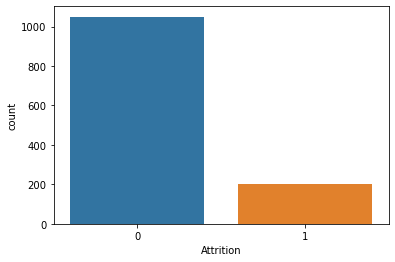

In [57]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 1196명 직원
* 이직자 : 195명, 이직율 : 0.163
* 이직율이 16.3% 는 적정한가? 동종 업계 수준은? 전년대비?

8) 추가 분석해 볼 사항이 있나요?

> * Attribute가 Target 이므로, feature들과 Target 과의 관계를 살펴보게 될 것.
* 그러므로 추가 분석하고자 하는 사항은 feature들을 살펴볼 때 도출하게 될 것이라 생각됨.

### ② OverTime	

In [58]:
ovt = attrition['OverTime']

1) 변수의 비즈니스 의미

In [ ]:
야근여부

2) 숫자, 범주?

In [59]:
ovt.unique()

array(['No', 'Yes'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [60]:
ovt.isna().sum()

0

4) 가변수화 필요 여부

In [61]:
ovt = np.where(ovt == 'Yes', 1, 0)

5) 기초통계량(수치화)

In [68]:
print(attrition['OverTime'].value_counts())
print(attrition['OverTime'].value_counts()/ len(attrition['OverTime']))

No     896
Yes    354
Name: OverTime, dtype: int64
No     0.7168
Yes    0.2832
Name: OverTime, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


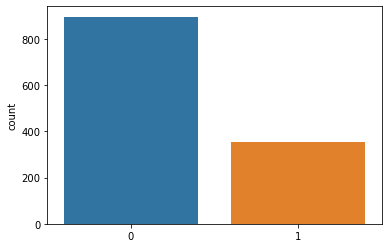

In [69]:
sns.countplot(ovt)
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
3분의 1정도 인원이 야근을 함
동종업계 야근 비율과 비교
경력, 직급 등과의 데이터와 연계하여 야근유무 확인

8) 추가 분석해 볼 사항이 있나요?

### ③ MaritalStatus

In [80]:
var='MaritalStatus'

1) 변수의 비즈니스 의미

In [ ]:
결혼유무

2) 숫자, 범주?

In [81]:
attrition[var].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [82]:
attrition[var].isna().sum()

0

4) 가변수화 필요 여부

In [83]:
attrition[var] =  attrition[var].map({'Single': 0, 'Married': 1, 'Divorced':2})

5) 기초통계량(수치화)

In [84]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

1    570
0    404
2    276
Name: MaritalStatus, dtype: int64
1    0.4560
0    0.3232
2    0.2208
Name: MaritalStatus, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


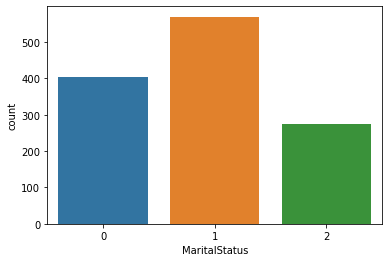

In [85]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
기혼이 반이상이나 이혼한 직원도 23프로 정도 존재
기혼과 미혼/이혼한 직원을 기준으로 이직여부 확인

8) 추가 분석해 볼 사항이 있나요?

### ④ JobSatisfaction

In [87]:
var='JobSatisfaction'

1) 변수의 비즈니스 의미

In [ ]:
직무만족도

2) 숫자, 범주?

In [88]:
attrition[var].unique()

array([3, 4, 1, 2], dtype=int64)

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [89]:
attrition[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
필요없음

5) 기초통계량(수치화)

In [90]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

4    397
3    368
1    250
2    235
Name: JobSatisfaction, dtype: int64
4    0.3176
3    0.2944
1    0.2000
2    0.1880
Name: JobSatisfaction, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


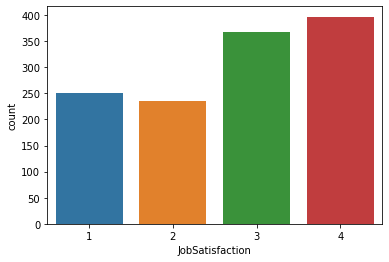

In [91]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
대부분 만족하나 3분의 1정도 만족하지 않고 만족하지 않은 사람중 불만족이 반이상 차지
3이상 만족하는 직원의 이직여부 확인과 동종업계 직무만족도 확인 필요

8) 추가 분석해 볼 사항이 있나요?

### ⑤ 추가1

In [96]:
var='RelationshipSatisfaction'

1) 변수의 비즈니스 의미

In [ ]:
직원간 관계만족도

2) 숫자, 범주?

In [93]:
attrition[var].unique()

array([4, 3, 2, 1], dtype=int64)

In [ ]:
범주

3) NaN 존재 유무 및 조치방안

In [94]:
attrition[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
X

5) 기초통계량(수치화)

In [97]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

3    397
4    365
2    258
1    230
Name: RelationshipSatisfaction, dtype: int64
3    0.3176
4    0.2920
2    0.2064
1    0.1840
Name: RelationshipSatisfaction, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


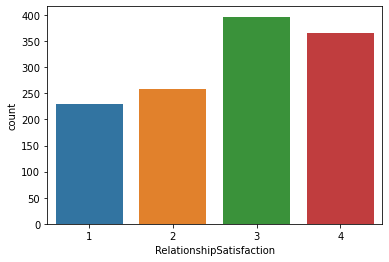

In [98]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
3분의 1정도 관계만족도가 좋지 않음
직무만족도와 비슷한 비율을 가지고 있음


8) 추가 분석해 볼 사항이 있나요?

In [ ]:
직무만족도와 이직여부 연계하여 분석필요

### ⑥ 추가2

In [100]:
var='WorkLifeBalance'

1) 변수의 비즈니스 의미

In [ ]:
워라벨

2) 숫자, 범주?

In [101]:
attrition[var].unique()

array([4, 3, 2, 1], dtype=int64)

3) NaN 존재 유무 및 조치방안

In [102]:
attrition[var].isna().sum()

0

4) 가변수화 필요 여부

In [ ]:
X

5) 기초통계량(수치화)

In [103]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

3    747
2    297
4    137
1     69
Name: WorkLifeBalance, dtype: int64
3    0.5976
2    0.2376
4    0.1096
1    0.0552
Name: WorkLifeBalance, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


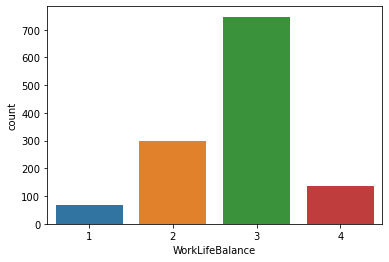

In [104]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
대부분 워라벨에 만족하는 편


8) 추가 분석해 볼 사항이 있나요?

### ⑦ 추가3

In [105]:
var ='Department'

1) 변수의 비즈니스 의미

In [ ]:
부서

2) 숫자, 범주?

In [106]:
attrition[var].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

3) NaN 존재 유무 및 조치방안

In [107]:
attrition[var].isna().sum()

0

4) 가변수화 필요 여부

In [108]:
attrition[var] =  attrition[var].map({'Research & Development': 0, 'Sales': 1, 'Human Resources':2})

5) 기초통계량(수치화)

In [109]:
print(attrition[var].value_counts())
print(attrition[var].value_counts()/ len(attrition[var]))

0    819
1    379
2     52
Name: Department, dtype: int64
0    0.6552
1    0.3032
2    0.0416
Name: Department, dtype: float64


6) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


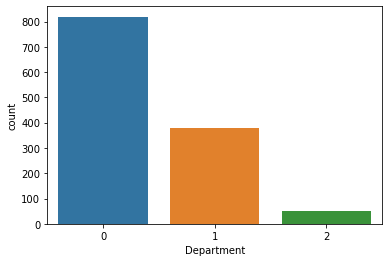

In [110]:
sns.countplot(attrition[var])
plt.show()

7) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

In [ ]:
대부분 연구개발쪽 업무를 진행하고 나머지는 영업업무를 진행함
각 분야별로 이직여부는 부서가 적고 대부분 연구개발이라 무의미해 보임

8) 추가 분석해 볼 사항이 있나요?